## Confguration Space

In this notebook you'll create a configuration space given a map of the world and setting a particular altitude for your drone. You'll read in a `.csv` file containing obstacle data which consists of six columns $x$, $y$, $z$ and $\delta x$, $\delta y$, $\delta z$.

You can look at the `.csv` file [here](/edit/colliders.csv). The first line gives the map center coordinates and the file is arranged such that:

* $x$ -> NORTH
* $y$ -> EAST
* $z$ -> ALTITUDE (+)

Each $(x, y, z)$ coordinate is the center of the obstacle. $\delta x$, $\delta y$, $\delta z$ are the half widths of the obstacles, meaning for example that an obstacle with $(x = 37, y = 12, z = 8)$ and $(\delta x = 5, \delta y = 5, \delta z = 8)$ is a 10 x 10 m obstacle that is 16 m high and centered at the point $(37, 12, 8)$.

Given a map like this, the free space in the $(x, y)$ plane is a function of altitude, and you can plan a path around an obstacle, or simply fly over it! You'll extend each obstacle by a safety margin to create the equivalent of a 3 dimensional configuration space. Your task is to extract a 2D map of your configuration space for a particular altitude, where each value is assigned either a 0 or 1 representing feasible or infeasible (obstacle) spaces respectively.

The end result should look something like this ... (colours aren't important)

![title](grid_map.png)

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
plt.rcParams["figure.figsize"] = [12, 12]

Read the csv file which contains the coordinates of the obstacles. 

In [3]:
filename = 'colliders.csv'
# Read in the data skipping the first two lines.  
# Note: the first line contains the latitude and longitude of map center
# Where is this??
data = np.loadtxt(filename,delimiter=',',dtype='Float64',skiprows=2)
print(data)

[[-310.2389   -439.2315     85.5         5.          5.         85.5     ]
 [-300.2389   -439.2315     85.5         5.          5.         85.5     ]
 [-290.2389   -439.2315     85.5         5.          5.         85.5     ]
 ..., 
 [ 257.8061    425.1645      1.75852     1.292725    1.292725    1.944791]
 [ 293.9967    368.3391      3.557666    1.129456    1.129456    3.667319]
 [ 281.5162    354.4156      4.999351    1.053772    1.053772    4.950246]]


In [4]:
# Static drone altitude (metres)
drone_altitude = 10

# Minimum distance required to stay away from an obstacle (metres)
# Think of this as padding around the obstacle.
safe_distance = 3

The given function will take the data from the file describing the obstacles city and will return a 2D grid representation showing open and closed spaces.

In [10]:
def create_grid(data, drone_altitude, safety_distance):
    """
    Returns a grid representation of a 2D configuration space
    based on given obstacle data, drone altitude and safety distance
    arguments.
    """

    # minimum and maximum north coordinates
    north_min = np.floor(np.min(data[:, 0] - data[:, 3]))
    north_max = np.ceil(np.max(data[:, 0] + data[:, 3]))

    # minimum and maximum east coordinates
    east_min = np.floor(np.min(data[:, 1] - data[:, 4]))
    east_max = np.ceil(np.max(data[:, 1] + data[:, 4]))

    # given the minimum and maximum coordinates we can
    # calculate the size of the grid.
    north_size = int(np.ceil(north_max - north_min))
    east_size = int(np.ceil(east_max - east_min))

    # Initialize an empty grid
    grid = np.zeros((north_size, east_size))

    # Populate the grid with obstacles
    for i in range(data.shape[0]):
        north, east, alt, d_north, d_east, d_alt = data[i, :]
        if alt + d_alt + safety_distance > drone_altitude:
            obstacle = [
                int(np.clip(north - d_north - safety_distance - north_min, 0, north_size-1)),
                int(np.clip(north + d_north + safety_distance - north_min, 0, north_size-1)),
                int(np.clip(east - d_east - safety_distance - east_min, 0, east_size-1)),
                int(np.clip(east + d_east + safety_distance - east_min, 0, east_size-1)),
            ]
            print(obstacle)
            grid[obstacle[0]:obstacle[1]+1, obstacle[2]:obstacle[3]+1] = 1

    return grid

In [11]:
grid = create_grid(data, drone_altitude, safe_distance)

[0, 13, 0, 13]
[7, 23, 0, 13]
[17, 33, 0, 13]
[27, 43, 0, 13]
[87, 103, 0, 13]
[97, 113, 0, 13]
[167, 183, 0, 13]
[177, 193, 0, 13]
[187, 203, 0, 13]
[197, 213, 0, 13]
[207, 223, 0, 13]
[217, 233, 0, 13]
[227, 243, 0, 13]
[267, 283, 0, 13]
[277, 293, 0, 13]
[297, 313, 0, 13]
[307, 323, 0, 13]
[327, 343, 0, 13]
[347, 363, 0, 13]
[357, 373, 0, 13]
[367, 383, 0, 13]
[407, 423, 0, 13]
[417, 433, 0, 13]
[427, 443, 0, 13]
[437, 453, 0, 13]
[447, 463, 0, 13]
[467, 483, 0, 13]
[657, 673, 0, 13]
[667, 683, 0, 13]
[677, 693, 0, 13]
[687, 703, 0, 13]
[697, 713, 0, 13]
[727, 743, 0, 13]
[737, 753, 0, 13]
[747, 763, 0, 13]
[757, 773, 0, 13]
[787, 803, 0, 13]
[797, 813, 0, 13]
[807, 823, 0, 13]
[817, 833, 0, 13]
[827, 843, 0, 13]
[837, 853, 0, 13]
[847, 863, 0, 13]
[877, 893, 0, 13]
[887, 903, 0, 13]
[0, 13, 7, 23]
[7, 23, 7, 23]
[17, 33, 7, 23]
[27, 43, 7, 23]
[37, 53, 7, 23]
[87, 103, 7, 23]
[97, 113, 7, 23]
[137, 153, 7, 23]
[147, 163, 7, 23]
[157, 173, 7, 23]
[167, 183, 7, 23]
[177, 193, 7, 23]


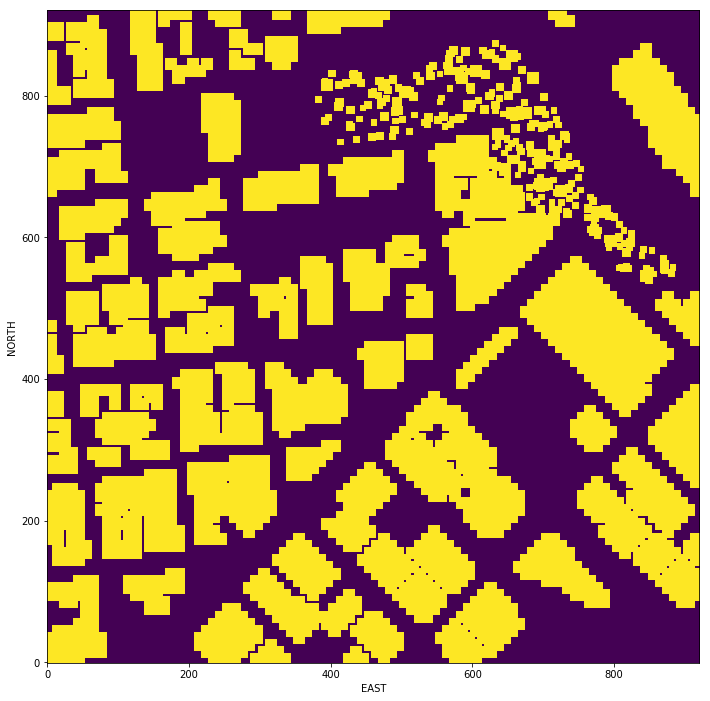

In [12]:
# equivalent to
# plt.imshow(np.flip(grid, 0))
plt.imshow(grid, origin='lower') 

plt.xlabel('EAST')
plt.ylabel('NORTH')
plt.show()

Play around with the `drone_altitude` and `safe_distance` values to get a feel for how it changes the map.

In [9]:
print(range(data.shape[0]))

range(0, 3845)
